<a href="https://colab.research.google.com/github/ibribr/ML/blob/master/Adaline_BGD_vs_SGD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Adaptive linear neuron (Adaline) - compare between Batch Gradient Desent (BGD) - and - Stochastic Grdient Desent (SGD) - IRIS data set

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy import random
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# Load IRIS data
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
print(df.tail())

       0    1    2    3               4
145  6.7  3.0  5.2  2.3  Iris-virginica
146  6.3  2.5  5.0  1.9  Iris-virginica
147  6.5  3.0  5.2  2.0  Iris-virginica
148  6.2  3.4  5.4  2.3  Iris-virginica
149  5.9  3.0  5.1  1.8  Iris-virginica


In [31]:
# extract 2 features and first 100 class labels (50 iris-setosa and 50 iris-versicolor)
x = df.iloc[0:100, [0, 2]].values
y = df.iloc[0:100,4].values
y =np.where(y=='Iris-setosa',1, -1)

# feature scaling
xn=(x-x.mean(axis=0))/x.std(axis=0)
#print(xn)
#print(y)
print(len(x))

print('y=',y[0])


100
y= 1


In [51]:
class adaline(object):
  def __init__(self, epochs=100, eta=0.1):
    self.epochs = epochs
    self.eta = eta

  def train(self, training_inputs, training_labels, mode='BGD'):
    x = training_inputs
    t = training_labels
    self.cost = []   # to plot cost function over epochs
    self.w = random.rand(training_inputs.ndim+1)
    for i in range(self.epochs):
      if mode=='BGD':
        net = np.dot(x, self.w[1:])+self.w[0]
        y = net  #linear activation function
        error = (t - y)   # this is vector
        #update weights using sum of gradients
        self.w[1:] += self.eta *  (np.dot(error, x)).mean()
        self.w[0] += self.eta * error.mean()
        cost = 0.5 * (error**2).sum()
        self.cost.append(cost)
      elif mode=='SGD':
        cost = 0
        for j in range(len(x)):
          net = np.dot(x[j,:],self.w[1:])+self.w[0]
          y = net
          error = (t[j]-y)
          #update the weights using SGD
          self.w[1:] += self.eta * np.dot(error, x[j,:])
          self.w[0] += self.eta * error
          cost += error**2;
        self.cost.append(cost/len(x))
    return self
  
  def predict(self, inputs):
    net=np.dot(inputs, self.w[1:])+self.w[0]
    return(np.where(net>=0, 1, -1)) 

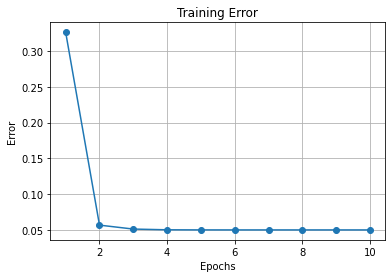

In [63]:
model=adaline(epochs=10, eta=0.1)
model.train(xn, y, mode='SGD')     # training mode ='BGD' or 'SGD'
predictions = model.predict(xn)

printout = 0
if printout:
  print(model.cost)
  print(model.w)
  print(predictions)

plt.plot(range(1,len(model.cost)+1), model.cost, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.title('Training Error')
plt.grid()
plt.show()

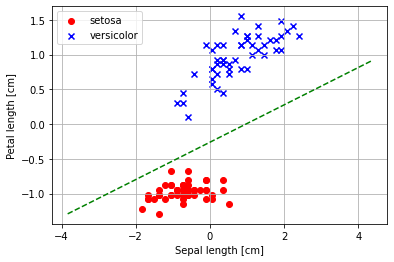

In [64]:
# scatter plot of predictions
plt.scatter(xn[predictions==1,0], xn[predictions==1,1], color='red', marker='o', label='setosa')
plt.scatter(xn[predictions==-1,0], xn[predictions==-1,1], color='blue', marker='x', label='versicolor')
# decsion line
xx1 = np.arange(xn[:,0].min()-2, xn[:,0].max()+2, 0.1)
xx2 = -model.w[1]/model.w[2] * xx1 - model.w[0]/model.w[2]
plt.plot(xx1, xx2, 'g--')
plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc='upper left')
plt.grid()
plt.show()